In [4]:
import pandas as pd
import numpy as np
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats

list_age = ['계','19~44','45~64','65~74','75 이상']
list_sex = ['계','남','여']
dic_df = {}

for z in range(0,10):
    for i in list_age:
        for j in list_sex:
            data1 = pd.read_csv('../../raw/통합 테이블(공원)_2019.csv')
            data2 = pd.read_csv('../../raw/지역사회건강조사 (전처리된 데이터)_2019/통합 테이블(건강)_2019.csv')
            data2.rename(columns={'지역':'자치구'},inplace = True)
            df2 = data2[data2['연령별'] == i]
            df2 = df2[df2['성별'] == j]
            df2.set_index('자치구',inplace = True)
            data1.set_index('자치구',inplace = True)
            df = pd.concat([df2,data1],axis=1)
            df = df.drop(df.index[0])
            df = df.drop(['연령별','성별'],axis=1)
            dic_df[df.columns[z]+i+j] = df[[df.columns[z],'1인당 생활권 도시림 면적']]

In [6]:
data3 = pd.read_csv('../../raw/서울시 자치구 재정자립도_2019.csv')
df2 = data2[data2['연령별'] == '계']
df2 = df2[df2['성별'] == '계']
df2.set_index('자치구',inplace = True)
data3.set_index('자치구',inplace = True)
df = pd.concat([df2,data1,data3],axis=1)
df = df.drop(df.index[0])
df = df.drop(['연령별','성별'],axis=1)
df = df[['주관적 건강수준','체중조절 경험 여부','걷기 실천','격렬한 신체활동 실천','중등도 신체활동 실천',
         '주관적 스트레스 수준','우울감 경험률','행복감 지수','1인당 생활권 도시림 면적','재정자립도','1인당 연소득']]

In [7]:
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sns
fm = mp.font_manager.FontManager()
plt.rcParams['font.family'] = 'Malgun Gothic'

In [8]:
corr = df.corr()
corr

,주관적 건강수준,체중조절 경험 여부,걷기 실천,격렬한 신체활동 실천,중등도 신체활동 실천,주관적 스트레스 수준,우울감 경험률,행복감 지수,1인당 생활권 도시림 면적,재정자립도,1인당 연소득
주관적 건강수준,1.000000,0.640303,0.236629,0.519261,0.307321,-0.399326,-0.366303,0.702460,0.552591,0.583957,0.615589
체중조절 경험 여부,0.640303,1.000000,0.306272,0.120088,0.296929,-0.038934,0.134637,0.659892,0.400428,0.322723,0.526910
걷기 실천,0.236629,0.306272,1.000000,0.309262,0.433586,-0.465611,-0.000070,0.190380,-0.207678,0.067965,0.070067
격렬한 신체활동 실천,0.519261,0.120088,0.309262,1.000000,0.422556,-0.266946,-0.262220,0.345276,0.125024,0.350336,0.292823
중등도 신체활동 실천,0.307321,0.296929,0.433586,0.422556,1.000000,-0.261465,0.094432,0.145373,0.100515,0.107257,0.357414
주관적 스트레스 수준,-0.399326,-0.038934,-0.465611,-0.266946,-0.261465,1.000000,0.540710,-0.029027,0.049085,-0.090678,0.099804
우울감 경험률,-0.366303,0.134637,-0.000070,-0.262220,0.094432,0.540710,1.000000,-0.100014,-0.200043,-0.498372,-0.091546
행복감 지수,0.702460,0.659892,0.190380,0.345276,0.145373,-0.029027,-0.100014,1.000000,0.342430,0.397033,0.629053
1인당 생활권 도시림 면적,0.552591,0.400428,-0.207678,0.125024,0.100515,0.049085,-0.200043,0.342430,1.000000,0.643910,0.687000
재정자립도,0.583957,0.322723,0.067965,0.350336,0.107257,-0.090678,-0.498372,0.397033,0.643910,1.000000,0.715965


C:\Users\gimhu\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\gimhu\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


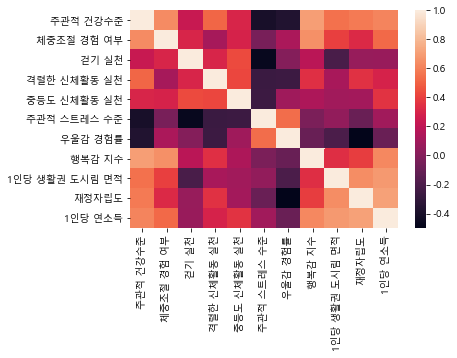

In [9]:
sns.heatmap(corr)
plt.rc('axes', unicode_minus=False)
plt.show()

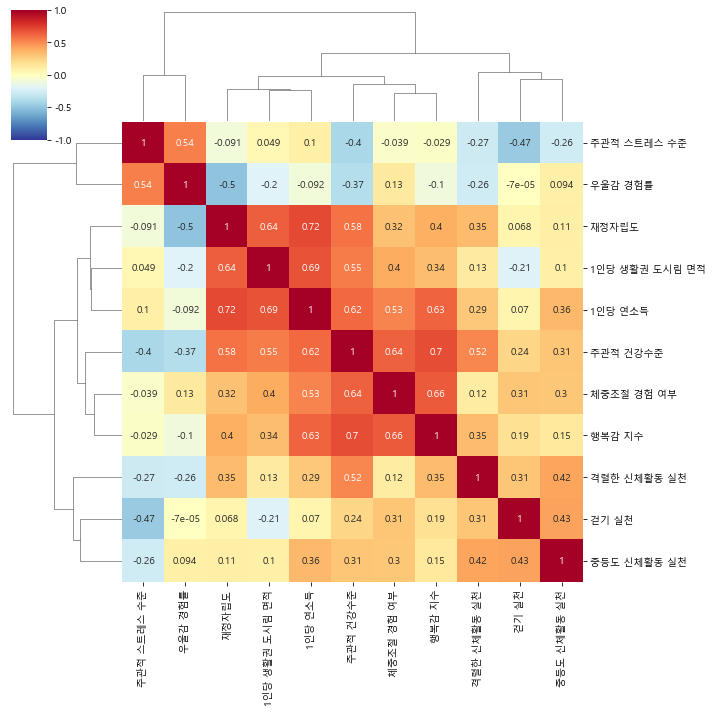

In [10]:
sns.clustermap(corr, annot = True, cmap = 'RdYlBu_r', vmin=-1, vmax = 1)

<ipython-input-11-2c928d3d36fb>:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


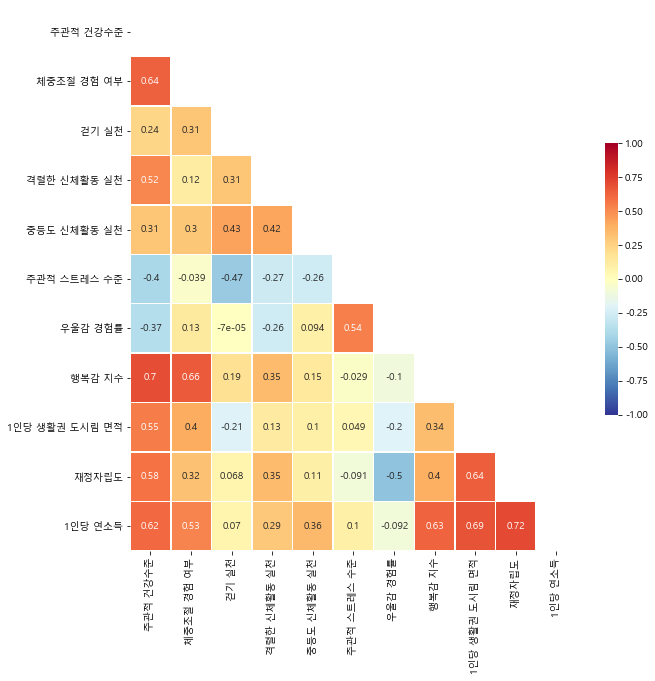

In [11]:
# 그림 사이즈 지정
fig, ax = plt.subplots( figsize=(10,10) )

# 삼각형 마스크를 만든다(위 쪽 삼각형에 True, 아래 삼각형에 False)
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# 히트맵을 그린다
sns.heatmap(corr, 
            cmap = 'RdYlBu_r', 
            annot = True,   # 실제 값을 표시한다
            mask=mask,      # 표시하지 않을 마스크 부분을 지정한다
            linewidths=.5,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": .5},# 컬러바 크기 절반으로 줄이기
            vmin = -1,vmax = 1   # 컬러바 범위 -1 ~ 1
           )  
plt.show()

In [13]:
df11 = dic_df['주관적 건강수준'+'계계']
df11.rename(columns={df11.columns[0]: df11.columns[0].replace(' ','_'),df11.columns[1]: df11.columns[1].replace(' ','_')},inplace = True)
df11.columns

Index(['주관적_건강수준', '1인당_생활권_도시림_면적'], dtype='object')

In [14]:
np.cov(df11[df11.columns[0]],df11[df11.columns[1]]) # 공분산 [0[1]

array([[37.1925    , 24.52300657],
       [24.52300657, 52.95222843]])

In [15]:
stats.pearsonr(df11[df11.columns[0]],df11[df11.columns[1]]) #피어슨 상관계수, p value

(0.5525911279571889, 0.004176190084243225)

C:\Users\gimhu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='주관적_건강수준', ylabel='1인당_생활권_도시림_면적'>

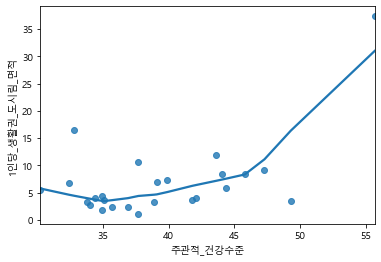

In [16]:
sns.regplot(df11.columns[0],df11.columns[1], lowess=True, data = df11)

Text(0.5, 1.0, '주관적_건강수준')

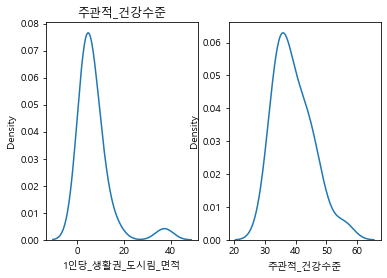

In [17]:
# 1행 2열 형태로 2개의 그래프를 그린다
fig, (ax1, ax2) = plt.subplots(1, 2)  

# speed의 밀도 플롯
sns.kdeplot(df11[df11.columns[1]], ax=ax1)
ax1.set_title(df11.columns[1])

# dist의 밀도 플롯
sns.kdeplot(df11[df11.columns[0]], ax=ax2)
ax1.set_title(df11.columns[0])

In [21]:
df22 = df11.rename(columns={df11.columns[0]: 'a',df11.columns[1]: 'b'})
model = smf.ols(formula = 'a ~ b', data = df22)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      a   R-squared:                       0.305
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     10.11
Date:                Fri, 16 Jul 2021   Prob (F-statistic):            0.00418
Time:                        16:23:28   Log-Likelihood:                -75.610
No. Observations:                  25   AIC:                             155.2
Df Residuals:                      23   BIC:                             157.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.0649      1.454     24.808      0.000      33.058      39.072
b              0.4631      0.146      3.180      0.004       0.162       0.764
==============================================================================
Omnibus:                        0.264   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.876   Jarque-Bera (JB):                0.004
Skew:                           0.027   Prob(JB):                        0.998
Kurtosis:                       2.967   Cond. No.                         14.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

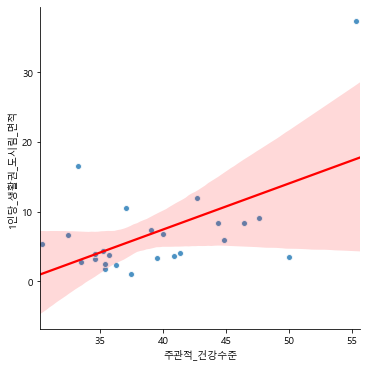

In [23]:
sns.lmplot(x=df11.columns[0], y=df11.columns[1], data=df11, line_kws={'color':"red"}, scatter_kws={'edgecolor':"white"}, x_jitter=.9)